In [103]:
import pandas as pd
import numpy as np
import cv2
from os import listdir
from copy import deepcopy
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

The classifier used is Gaussian Bayes Classifier, also to draw the ROC, I calculated probability of each class and avoid using discriminant function.

Manchester is labeled as '1' and Chelsea as '0'.

Mean of three color channels are calculated and used as features.

In [113]:
data = []
labels = []
for i, filename in enumerate(listdir("Q12_Dataset/")):
    c = cv2.imread("Q12_Dataset/"+filename)
    mean = c.reshape((-1,3)).mean(axis=0)
    data.append(mean)
    labels.append(int('m' in filename))


In [75]:
def preprocess_data(data, labels, test_size=25):
    train_data = deepcopy(data)
    train_labels = deepcopy(labels)
    test_data = []
    test_label = []
    for i in range(test_size):
        j = np.random.randint(0, len(train_labels))
        test_data.append(train_data.pop(j))
        test_label.append(train_labels.pop(j))
    test_data = np.array(test_data).reshape((test_size,-1))
    train_data = np.array(train_data).reshape((len(train_labels),-1))
    test_data = test_data 
    train_data = train_data
    return train_data, test_data, np.array(train_labels), np.array(test_label)


In [114]:
def predict(x, Sigma, means):
    p = []
    for i in range(2):
        pi = 1/((2*np.pi)**(len(means[i])) * np.linalg.det(Sigma[i])) ** (1/2)
        pi *= np.exp(-1/2*((x - means[i]).T @ np.linalg.inv(Sigma[i]) @ (x - means[i])))
        p.append(pi)
    p = np.array(p)/np.sum(p)
    return p[1] #probabilty of being manchester

In [115]:
def train(train_data, train_label):
    means = []
    Sigma = []
    for i in range(2):
        means.append(train_data[(train_label == i)].mean(axis=0))
        Sigma.append(np.cov(train_data[(train_label == i)], rowvar=False))
    Sigma = np.array(Sigma)
    means = np.array(means)
    return means, Sigma

In [123]:
train_data, test_data, train_label, test_label = preprocess_data(data, labels, 30)
means, Sigma = train(train_data, train_label)

confusion_matrix = np.zeros((2,2))
predicted = []
for i, x in enumerate(test_data):
    predicted.append(predict(x, Sigma, means))
    confusion_matrix[test_label[i]][int(np.round(predicted[-1]))] += 1
predicted = np.array(predicted)
print("CCR is ", (confusion_matrix.diagonal()).sum()/len(test_label))
print("Confusion Matrix:")
print(confusion_matrix)

CCR is  0.8333333333333334
Confusion Matrix:
[[16.  2.]
 [ 3.  9.]]


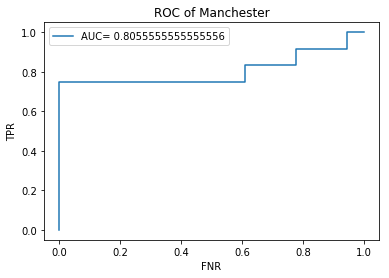

In [124]:
fpr, tpr, threshold = roc_curve(test_label, predicted, drop_intermediate=False)
plt.plot(fpr, tpr, label="AUC= "+str(roc_auc_score(test_label, predicted)))
plt.title("ROC of Manchester")
plt.ylabel("TPR")
plt.xlabel("FNR")
plt.legend()
plt.show()

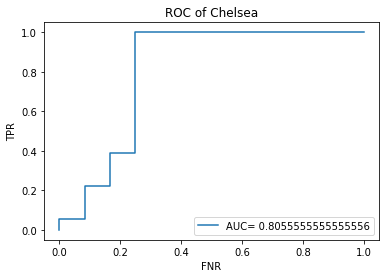

In [125]:
fpr, tpr, threshold = roc_curve(1-test_label, 1-predicted, drop_intermediate=False)
plt.plot(fpr, tpr, label="AUC= "+str(roc_auc_score(1-test_label, 1-predicted)))
plt.title("ROC of Chelsea")
plt.ylabel("TPR")
plt.xlabel("FNR")
plt.legend()
plt.show()